In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import warnings

warnings.filterwarnings('ignore')


df = pd.read_csv('customer_churn.csv')

# Handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Label Encoding for binary categorical variables 
from sklearn.preprocessing import LabelEncoder
label_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
label_encoder = LabelEncoder()

for col in label_columns:
    df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding for multi-category columns 
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)




X = df.drop(columns=['customerID', 'Churn'])  # Drop customerID and target
y = df['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
from sklearn.svm import SVC

# SVM model
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# predictions
y_pred_svm = svm.predict(X_test)

# Evaluate 
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Accuracy: 0.724822695035461
Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84       511
           1       0.00      0.00      0.00       194

    accuracy                           0.72       705
   macro avg       0.36      0.50      0.42       705
weighted avg       0.53      0.72      0.61       705



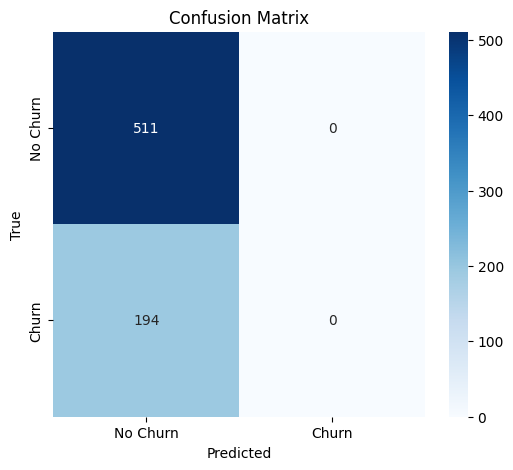

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# confusion matrix using heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
